In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
DATA_DIRECTORY = 'Z:/fml-final/data/0-perfect/'

In [3]:
rewards_in_step = np.zeros(400)
got_to_step = np.zeros(400)
transition_counter = 0
game_counter = 0

for filename in tqdm(os.listdir(DATA_DIRECTORY)):
    with open(DATA_DIRECTORY + filename, "rb") as file:
        paths = pickle.load(file)

        for path in paths:
            game_counter += 1
            for step, transition in enumerate(path):
                rewards_in_step[step] += transition[2]
                got_to_step[step] += 1
                transition_counter += 1

100%|██████████| 45/45 [03:05<00:00,  4.13s/it]


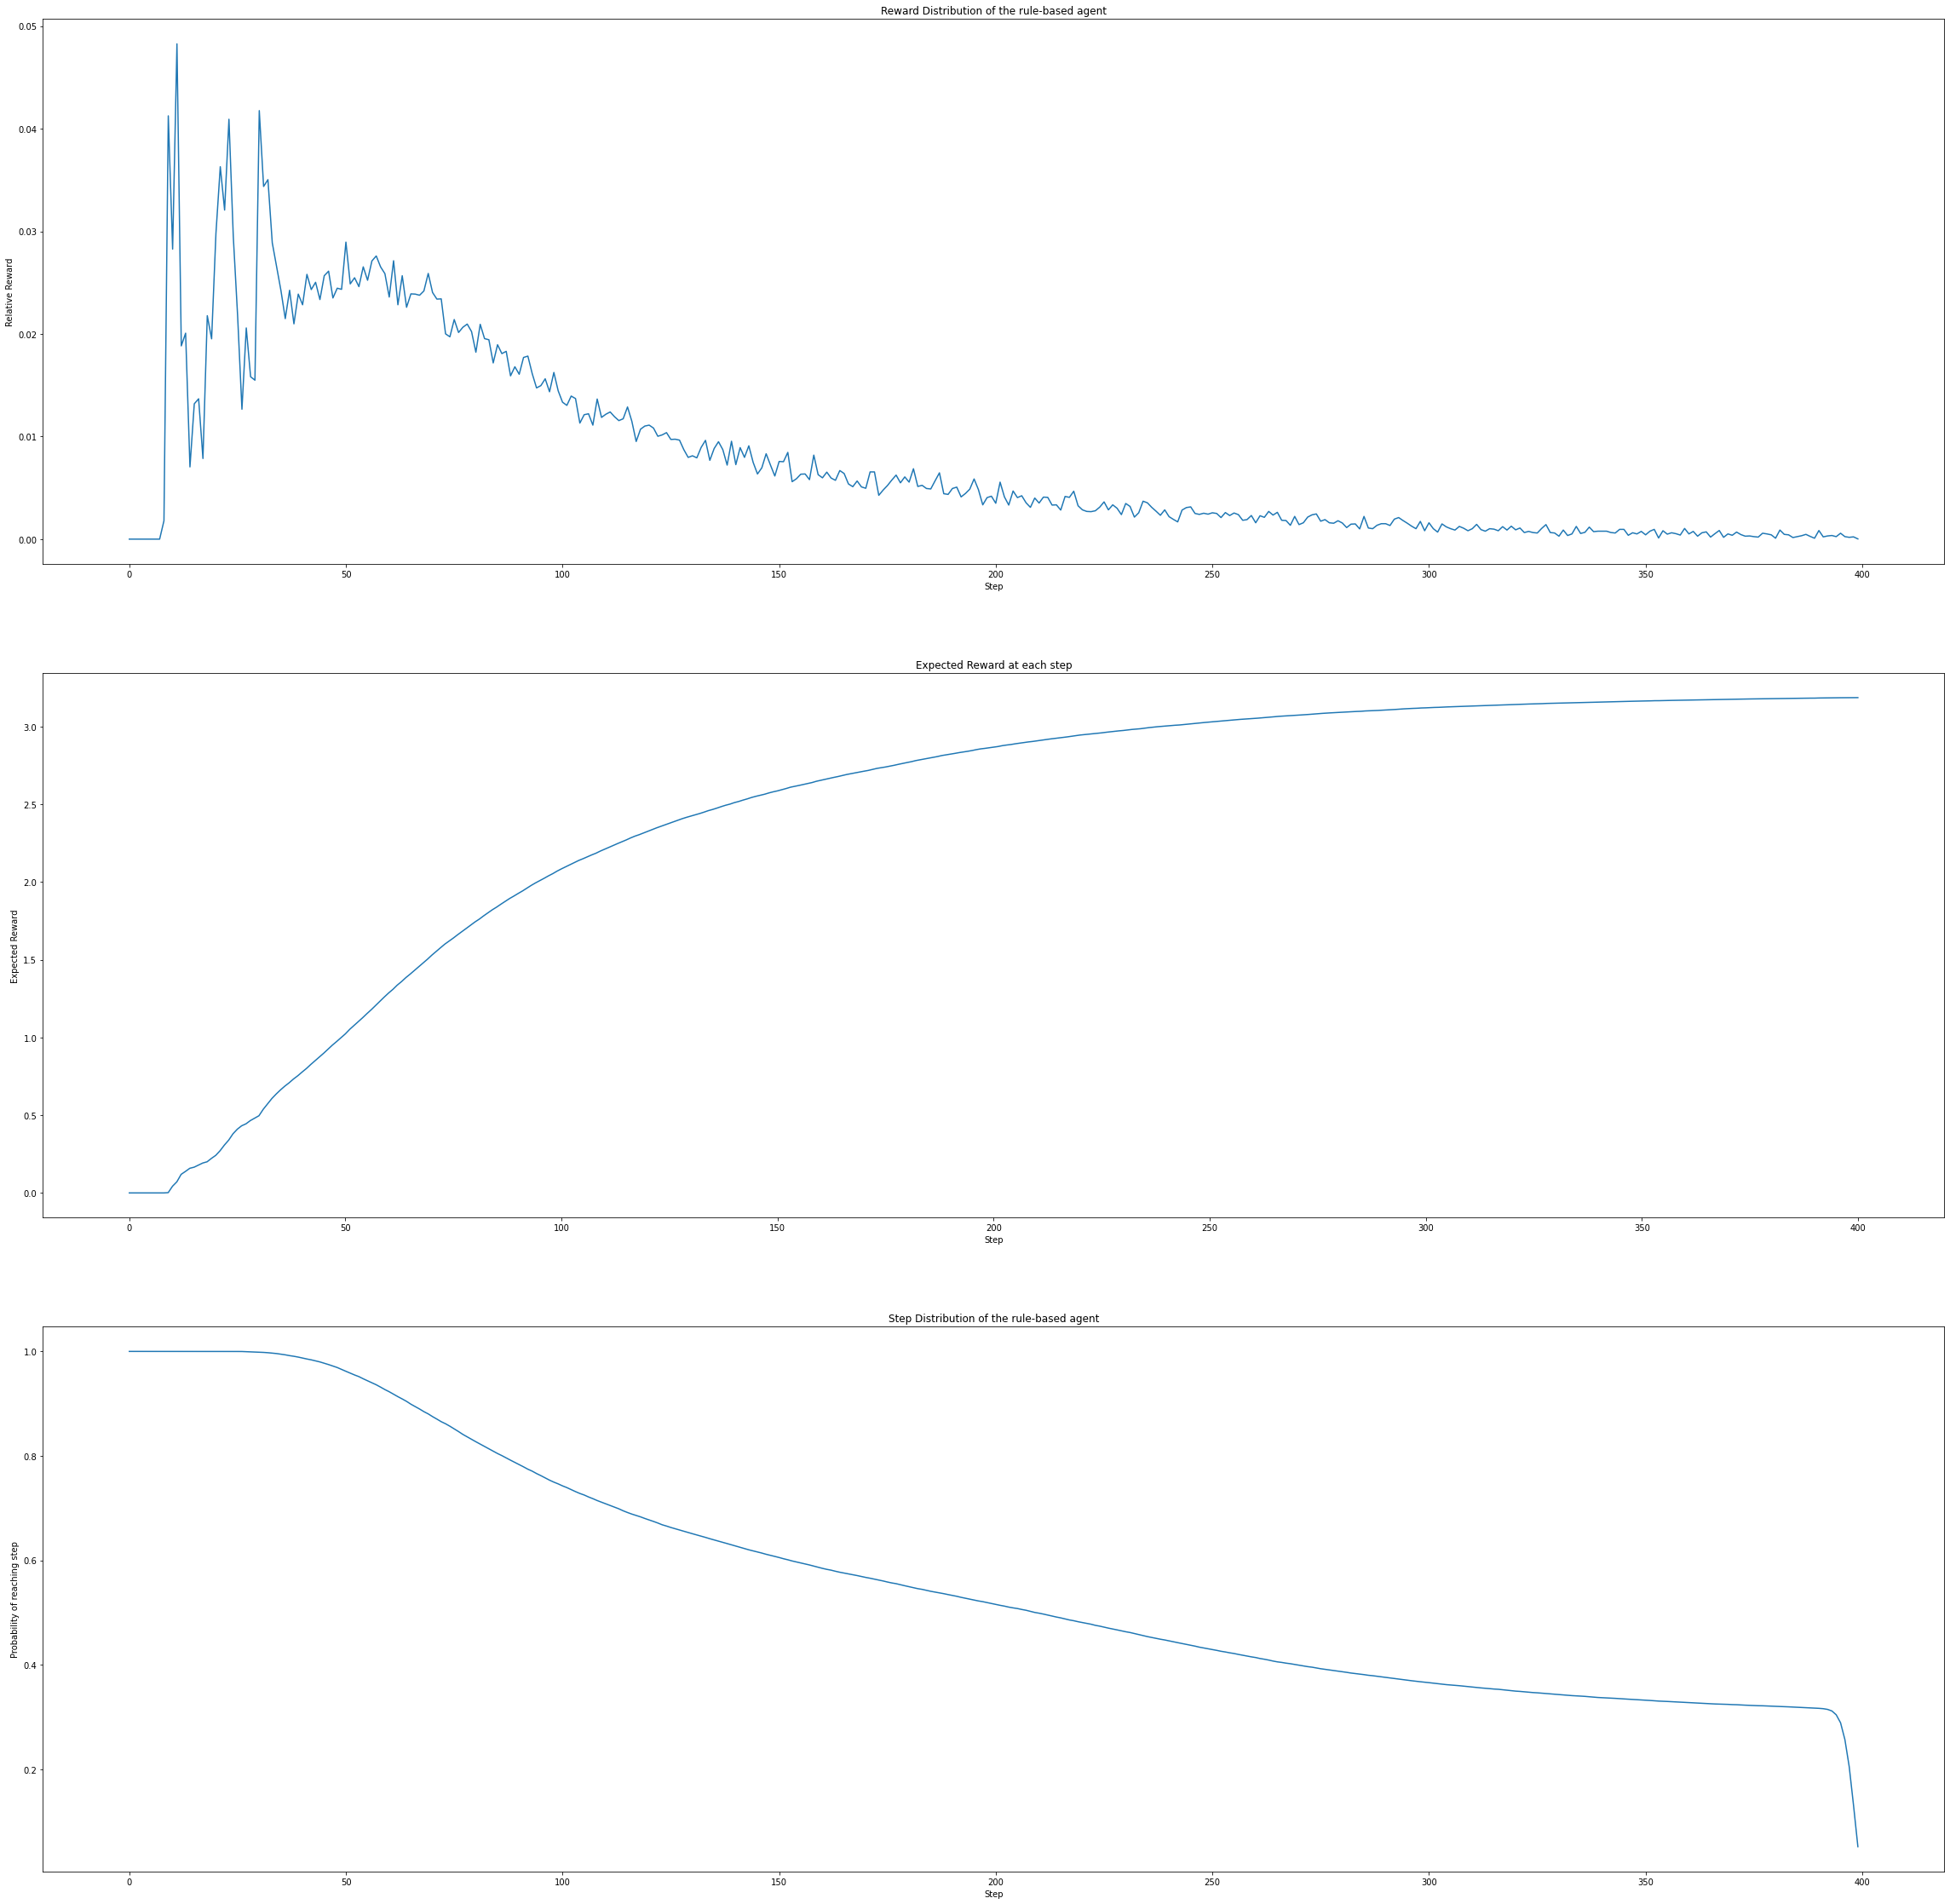

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(40, 40))

ax[0].plot(np.arange(len(rewards_in_step)), rewards_in_step / game_counter)
ax[0].set_title("Reward Distribution of the rule-based agent")
ax[0].set_xlabel("Step")
ax[0].set_ylabel("Relative Reward");

ax[1].plot(np.arange(401), [np.sum(rewards_in_step[:i]) / game_counter for i in range(401)])
ax[1].set_title("Expected Reward at each step")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Expected Reward");

ax[2].plot(np.arange(len(got_to_step)), got_to_step / game_counter)
ax[2].set_title("Step Distribution of the rule-based agent")
ax[2].set_xlabel("Step")
ax[2].set_ylabel("Probability of reaching step");

In [5]:
print(f"expected reward per game: {np.round(np.sum(rewards_in_step) / game_counter, 3)}")

expected reward per game: 3.187


In [6]:
print(f"missed expected reward if agent dies in step 100: {np.round(np.sum(rewards_in_step[100:]) / game_counter, 3)}")

missed expected reward if agent dies in step 100: 1.102


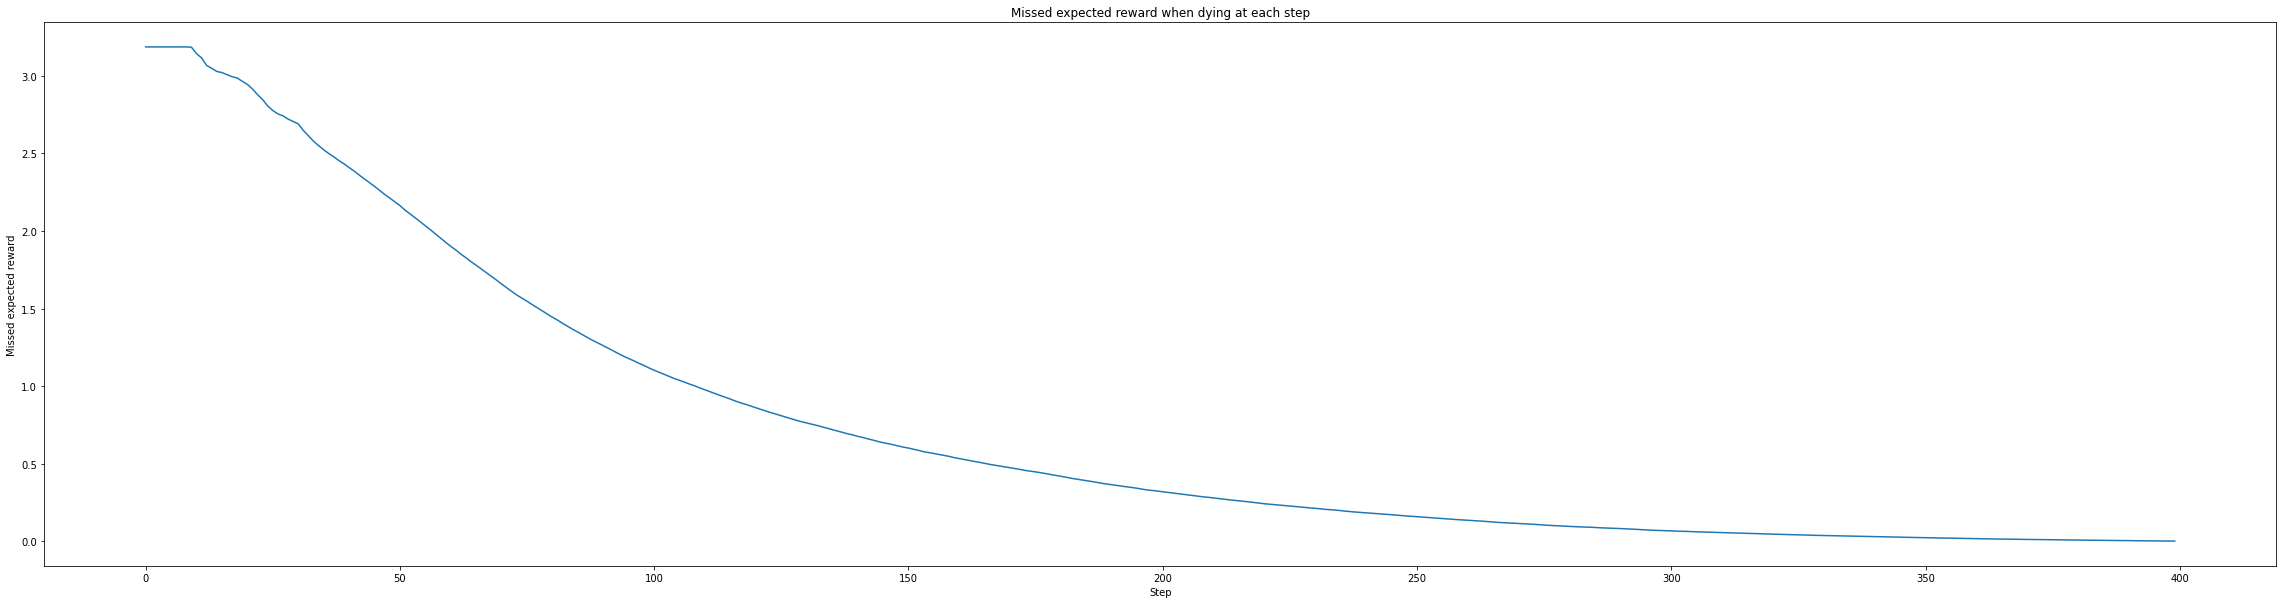

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(40, 10))

ax.plot(np.arange(len(rewards_in_step)), [np.sum(rewards_in_step[i:]) / game_counter for i in range(400)])
ax.set_title("Missed expected reward when dying at each step")
ax.set_xlabel("Step")
ax.set_ylabel("Missed expected reward");

In [8]:
# with open("reward_distribution.pt", "wb") as file:
#     pickle.dump(rewards_in_step, file)

# with open("got_to-step_distribution_normed.pt", "wb") as file:
#     pickle.dump(got_to_step / np.sum(got_to_step), file)

In [9]:
# with open("expected_missing_reward.pt", "wb") as file:
#     pickle.dump(np.array([np.sum(rewards_in_step[i:]) / game_counter for i in range(400)]), file)

In [10]:
with open("missed_expected_reward.pt", "wb") as file:
    pickle.dump(np.array([np.sum(rewards_in_step[i:]) / game_counter for i in range(401)]), file)

In [10]:
def gaussian(A, m, s, x):
    return A * np.exp(-(x - m)**2 / s**2)

In [43]:
actions = 0
random_actions = 0
died_at = []

WIDTH = 100
EPSILON = 0.9

got_to_step_distribution_normed = got_to_step / np.sum(got_to_step)
die_at_step = (game_counter - got_to_step) / np.sum(game_counter - got_to_step)

for i in tqdm(range(1000)):
    n_steps_this_round = np.random.choice(np.arange(400), p=got_to_step_distribution_normed)

    for step in range(n_steps_this_round):

        middle = np.random.randint(400)

        if middle - WIDTH / 2 < step and step < middle + WIDTH / 2 and np.random.random() < EPSILON:
            random_actions += 1
        else:
            actions += 1

        if np.random.random() < die_at_step[step]:
            died_at.append(step)
            break

np.round(random_actions / (actions + random_actions), 3)

100%|██████████| 1000/1000 [00:00<00:00, 1860.25it/s]


0.204

1846 1000


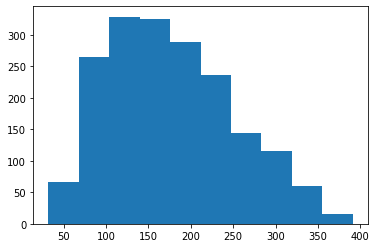

In [36]:
print(len(died_at), 1000)
plt.hist(died_at);